作成日: 2020/11/19  
作成者: K Sato(株式会社エクテック)  
連絡先: kazuhiro.sato@ex-tech.co.jp  
SNS: [Linkedin](https://www.linkedin.com/in/kazuhiro-sato-sendai)

### livedoorニュースコーパスを利用する[2012年]
[RONDHUIT livedoorニュースコーパス](https://www.rondhuit.com/download.html)が提供してくれているニュースコーパスを利用する。  
**原著作者のクレジットを表示し、ニュース記事の改変をしないことを条件に、記事全文を自由に転載・引用が可能です。**  
  
  
(抜粋)  
livedoor ニュースコーパス  
  
概要  
本コーパスは、NHN Japan株式会社が運営する「livedoor ニュース」のうち、  
下記のクリエイティブ・コモンズライセンスが適用されるニュース記事を収集し、可能な限りHTMLタグを取り除いて作成したものです。  
  
トピックニュースhttp://news.livedoor.com/category/vender/news/  
Sports Watchhttp://news.livedoor.com/category/vender/208/  
ITライフハックhttp://news.livedoor.com/category/vender/223/  
家電チャンネルhttp://news.livedoor.com/category/vender/kadench/  
MOVIE ENTERhttp://news.livedoor.com/category/vender/movie_enter/  
独女通信http://news.livedoor.com/category/vender/90/  
エスマックスhttp://news.livedoor.com/category/vender/smax/  
livedoor HOMMEhttp://news.livedoor.com/category/vender/homme/  
Peachyhttp://news.livedoor.com/category/vender/ldgirls/  
  
収集時期：2012年9月上旬 ダウンロード（通常テキスト）：ldcc-20140209.tar.gz ダウンロード（Apache Solr向き）：  
livedoor-news-data.tar.gz 論文などで引用する場合は、このURLを参照してください。  
  
ライセンス  
各記事ファイルにはクリエイティブ・コモンズライセンス「表示 – 改変禁止」が適用されます。   
クレジット表示についてはニュースカテゴリにより異なるため、ダウンロードしたファイルを展開したサブディレクトリにある  
それぞれの LICENSE.txt をご覧ください。 livedoor はNHN Japan株式会社の登録商標です。

#### 上記の、ニュース記事をもとにして...
例えば、以下の課題を機械学習を利用して解決するソリューションを実際に作ってみる。  
  
**『とある会社では、様々なニュース記事をインターネット上で収集し、それぞれの記事のソース元をラベル付けしている。  
過去のニュース記事についてはラベル付けがされておらず、1つ1つ記事のソース元を調べては、手動でラベル付けをしていた。  
しかし大量の過去ニュース記事を、1つ1つ手動で調べていては、工数がかかり現場の負担が大きいことがわかっており、なんとかして、  
これらを自動化して、工数を削減できないか模索していた...』**  
  
このような課題に対して、下記の前提条件があるとします。  
  
前提条件1: ニュース記事の内容のみをみて、そこから手動で検索をかけて該当するラベルを付けている  
前提条件2: 2000件強のニュース記事のラベル付けは正確に行われていて、300件ほどが未実施のものがある  
前提条件3: "dokujo-tsushin", "it-life-hack", "livedoor-homme"の3つで記事をラベル付けしている  

これらの前提条件のもと、機械学習を用いて解決しようとしてみます。  
  
**【アイデア】**  
1. すでに、正しくラベル付けをされている2000件強のニュース記事をもとに、学習用データと検証用データに分けて  
    とりあえずSVM(Support Vector Machine)をいくつかパラメータを変えて、比較的精度の高い、適切なパラメータを選定する    
2. 未実施分の約300件を『現実』適した課題と捉えて、構築済のモデルを試す  
  
※扱うライブラリは別途、インポートしてきます。

In [1]:
# 遅いコードなので、後にリファクタする
import os

In [2]:
# ファイルの読み込み、及びタイトル・本文データの取得
path_list = ["dokujo-tsushin", "it-life-hack", "livedoor-homme"]
news_list = []
labels = []

In [3]:
# トレーニングデータのファイル数をカウント
counter = 0

In [4]:
for p in path_list:
    path = "./DATA/training_data/"+p
    # 対象の学習用ファイルをすべて取得してくる
    f_list = os.listdir(path)
    
    for lists in f_list:
        counter += 1
        with open("./DATA/training_data/"+ p+ "/"+lists, encoding="utf-8", errors='ignore') as f:
            next(f)
            # スペースや改行の削除を行う
            w = f.read().replace('\u3000','').replace('\n','')

            news_list.append(w)
            labels.append(path_list.index(p))

In [5]:
print(counter)

2012


取得してきた、正しくラベル付けされたニュース記事は2012件ある  
使うライブラリは、日本語の記事なので、Mecabを利用。

In [6]:
import MeCab
#import nltk

In [7]:
# 正規表現を使うかもなので、reモジュールを利用
import re

In [8]:
# 取得したニュース記事の1つ目の内容
news_list[0]

'2012-02-25T10:30:00+0900タニタに続き、第二弾！ 話題の社員食堂は家庭薬膳タニタだけじゃない。2008年から社員食堂を一般公開しているのはロート製薬が運営する旬穀旬菜cafe。身体にいい家庭薬膳料理を食べさせてもらえると女性たちから圧倒的な支持を得ている。製薬会社ならではの健康に留意したメニューとそのお味は？JR浜松町駅から徒歩七分。お腹を空かせてランチタイムの旬穀旬菜cafeを訪れた。店内は社食というイメージを払拭するほど明るくてお洒落だ。午前11時半の開店と同時に店内には次々と女性客が入ってくる。平日の午後2時までの営業だが、店内は12時には満席になるとのこと。女性客が圧倒的に多い。なぜ社員食堂のメニューに薬膳料理をと考えられたのだろうか？同社の菊地寿子さんにお聞きした。「最近は温室栽培などのおかげで夏野菜を冬に食べたりできますが、食材に季節感がなくなっています。四季折々、その時々で旬のものを食べるのが実は身体には一番いいのです。社員に健康でいきいき働いてもらうためにまずは食生活からと、旬の食材を使ったメニューを国際薬膳師の堀実佐子先生に作っていただきました」旬の食材を使い、見た目も美しく食べて頂きたいとの思いで開発されたメニューとのこと。季節が変われば食材も変わる。メニューは毎月変わる。本日の日替わり定食は主菜がサワラの南天焼きと鶏肉のはちみつ生姜焼きの二種類。サワラは粘膜を丈夫にして肌や髪に潤いを与えるといわれ、鶏肉は、気力を増し免疫力アップに働くといわれるとのこと。迷った末にサワラを頂くことに。ご飯は玄米を選んだ。薬膳料理といえば味気ない病人食のようなイメージを持っていたのだが、黒いお盆で運ばれてきた料理は色鮮やかだ。主菜のサワラは降り積もった雪の間から南天の赤い実が顔をのぞかせているイメージで作られたもの。赤い実はいくらと豪華。さらに副菜に厚揚げの山菜ドレッシング、小松菜のザ—サイ和え、キャベツの味噌汁と品数も多い。これで価格は税込み1050円でいいのでしょうか？「はい、福利厚生のおすそわけです」と菊地さん。ロート製薬では「心身ともに健康であるため」の活動を社内だけに根付かせるだけではもったいない。 そんな想いから、東京支社の新社屋への引っ越しを機に社員食堂を一般の人にも開放をしたそうだ。満席の店内では社員の方たちも食事をされてい

### コーパスクリーニング、クレンジング

In [9]:
mecab = MeCab.Tagger('mecabrc')

# 記事の塊のdict(辞書型)について、まとめて形態素解析＆リストで返す関数
def get_words_all_text(contexts):
    ret = []
    for  context in contexts:
        ret.append(get_words(context))
    return ret

# 一つの記事について形態素解析してリストとして返す関数
def get_words(context):
    return [token for token in tokenizer(context)]

# 形態素解析で、名詞のみを取り出す関数
def tokenizer(text):
    node = mecab.parseToNode(text)
    while node:
        if node.feature.split(',')[0] == '名詞':
            yield node.surface.lower()
        node = node.next

In [10]:
words = get_words_all_text(news_list)
print(words[0])

['2012', '-', '02', '-', '25', 't', '10', ':', '30', ':', '00', '+', '0900', 'タニタ', '二', '弾', '話題', '社員', '食堂', '家庭', '薬', '膳', 'タニタ', '2008', '年', '社員', '食堂', '一般', '公開', 'の', 'ロート製薬', '運営', '旬', '穀', '旬', '菜', 'cafe', '身体', '家庭', '薬', '膳', '料理', '女性', 'たち', '圧倒的', '支持', '製薬', '会社', 'ならでは', '健康', '留意', 'メニュー', '味', 'jr', '浜松町', '駅', '徒歩', '七', '分', 'お腹', 'ランチタイム', '旬', '穀', '旬', '菜', 'cafe', '店内', '社', '食', 'イメージ', '払拭', 'お洒落', '午前', '11', '時半', '開店', '店内', '女性', '客', '平日', '午後', '2', '時', '営業', '店内', '12', '時', '満席', 'こと', '女性', '客', '圧倒的', '社員', '食堂', 'メニュー', '薬', '膳', '料理', 'の', '同社', '菊地', '寿子', 'さん', '最近', '温室', '栽培', 'おかげ', '夏', '野菜', '冬', '食材', '季節', '感', '四季', '旬', 'もの', 'の', '身体', '一番', 'の', '社員', '健康', 'ため', '食生活', '旬', '食材', 'メニュー', '国際', '薬', '膳', '師', '堀', '実', '佐', '子', '先生', '旬', '食材', '見た目', '思い', '開発', 'メニュー', 'こと', '季節', '食材', 'メニュー', '毎月', '本日', '日替わり', '定食', '菜', 'サワラ', '南天', '焼き', '鶏肉', 'はちみつ', '生姜', '焼き', '二', '種類', 'サワラ', '粘膜', '丈夫', '肌', '髪', '潤い', '鶏肉', '気力', 

**Mecabを利用して、記事の文章から "名詞" を抽出**

#### コーパス 「言語学において、自然言語処理の研究に用いるため、自然言語の文章を構造化し大規模に集積したもの。」

**gensim**ライブラリを利用して、得られたニュース記事のコーパスを再度辞書化する。  
このとき、1つ１つのユニークな単語にユニークなIDを付与していく。  
  
no_below・・出現文書数N未満の単語を削除  
no_above・・出現文書率がN％より上（N%は除かれない）の単語を削除  
keen_n・・no_below,no_aboveによるフィルターに関わらず、指定した数の単語が保持される。  
keep_tokens・・指定した単語を保持する。(keep_tokens=['human', 'survey']のように指定)  

In [11]:
from gensim import corpora

dictionary = corpora.Dictionary(words)
dictionary.filter_extremes(no_below = 200, no_above = 0.2)
courpus = [dictionary.doc2bow(word) for word in words]

得られたコーパスの1つ目をみてみると...

In [12]:
courpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 3),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 4),
 (9, 2),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 2),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1)]

ベクトル表現できたコーパスをもとに、今度は密度計算をする(単語の重要度)

In [13]:
from gensim import matutils

def vec2dense(vec, num_terms):
    return list(matutils.corpus2dense([vec], num_terms=num_terms).T[0])

In [14]:
data_all = [vec2dense(dictionary.doc2bow(words[i]),len(dictionary)) for i in range(len(words))]

In [15]:
data_all[0]

[1.0,
 1.0,
 1.0,
 2.0,
 3.0,
 1.0,
 1.0,
 1.0,
 4.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

**ここまで、機械学習用のデータにするための『前処理』でした**

### 機械学習 SVM

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [17]:
# トレーニング・テストデータの分割をします、ここでは2012件のうち、６割を学習用データ、4割を検証用データにしています
train_data = data_all
X_train, X_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.4, random_state=1)

In [18]:
# 説明変数となる学習用、検証用それぞれの件数
print(len(X_train), len(X_test))

1207 805


In [19]:
# 目的変数となる学習用、検証用のラベル、それぞれの件数
print(len(y_train), len(y_test))

1207 805


**ここで行うことは、いわば『参考書をひたすら解いて、模擬試験を解いてはやり直して、本番合格するまでの日々の学習』になります。**

In [20]:
#データの標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
# SVCのパラメータをいくつか試す
kernels = [
    'linear',
    'poly',
    'rbf',
    'sigmoid'
]
cs = [
    1,
    2,
    3,
    4,
    5
]

In [22]:
# いくつかのパラメータで、学習モデルを作成する
results = []
for knl in kernels:
    for c in cs:
        clf = SVC(C = c, kernel = knl)
        clf.fit(X_train_std, y_train)
        
        score = clf.score(X_test_std, y_test)
        print(f"kernelパラメータ: {knl}, Cパラメータ: {c}")
        print("{:.4g}".format(score))
        
        result = []
        result.append(str(knl)+':'+str(c))
        result.append(round(score, 4))
        results.append(result)

kernelパラメータ: linear, Cパラメータ: 1
0.8472
kernelパラメータ: linear, Cパラメータ: 2
0.841
kernelパラメータ: linear, Cパラメータ: 3
0.841
kernelパラメータ: linear, Cパラメータ: 4
0.841
kernelパラメータ: linear, Cパラメータ: 5
0.841
kernelパラメータ: poly, Cパラメータ: 1
0.6522
kernelパラメータ: poly, Cパラメータ: 2
0.7168
kernelパラメータ: poly, Cパラメータ: 3
0.7441
kernelパラメータ: poly, Cパラメータ: 4
0.754
kernelパラメータ: poly, Cパラメータ: 5
0.7627
kernelパラメータ: rbf, Cパラメータ: 1
0.8696
kernelパラメータ: rbf, Cパラメータ: 2
0.8832
kernelパラメータ: rbf, Cパラメータ: 3
0.8795
kernelパラメータ: rbf, Cパラメータ: 4
0.882
kernelパラメータ: rbf, Cパラメータ: 5
0.8832
kernelパラメータ: sigmoid, Cパラメータ: 1
0.8634
kernelパラメータ: sigmoid, Cパラメータ: 2
0.8671
kernelパラメータ: sigmoid, Cパラメータ: 3
0.8571
kernelパラメータ: sigmoid, Cパラメータ: 4
0.8509
kernelパラメータ: sigmoid, Cパラメータ: 5
0.846


In [23]:
results

[['linear:1', 0.8472],
 ['linear:2', 0.841],
 ['linear:3', 0.841],
 ['linear:4', 0.841],
 ['linear:5', 0.841],
 ['poly:1', 0.6522],
 ['poly:2', 0.7168],
 ['poly:3', 0.7441],
 ['poly:4', 0.754],
 ['poly:5', 0.7627],
 ['rbf:1', 0.8696],
 ['rbf:2', 0.8832],
 ['rbf:3', 0.8795],
 ['rbf:4', 0.882],
 ['rbf:5', 0.8832],
 ['sigmoid:1', 0.8634],
 ['sigmoid:2', 0.8671],
 ['sigmoid:3', 0.8571],
 ['sigmoid:4', 0.8509],
 ['sigmoid:5', 0.846]]

In [26]:
import pandas as pd
df = pd.DataFrame(results,
                  columns=['para', 'score'])

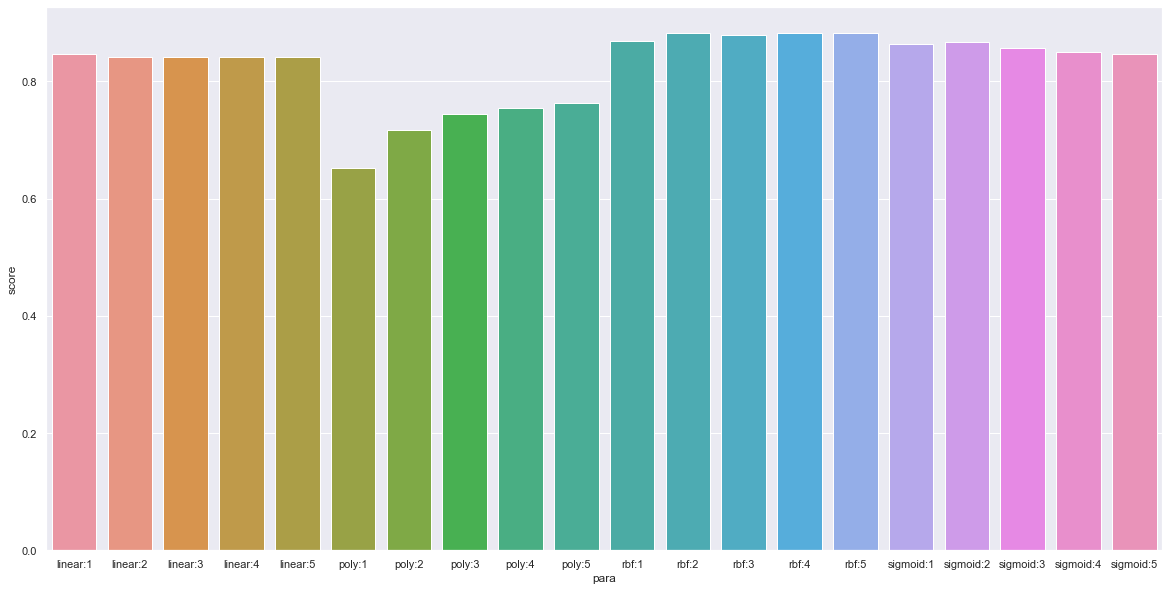

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(20, 10))
ax.set(xlim=(0.75,1))
sns.barplot(x="para", y="score", data=df, ax=ax)

### 以上から、ニュース記事の内容だけで、ラベルをつけることができるモデルを構築できました
['rbf:1', 0.8696],  
['rbf:2', 0.8832],  
['rbf:3', 0.8795],  
['rbf:4', 0.882],  
['rbf:5', 0.8832],  
['sigmoid:1', 0.8634],  
['sigmoid:2', 0.8671]  
この辺りのパラメータが、比較的精度高くモデルを作れそうです

ここからは実際に、『未知のデータ』を扱って、実践的な検証をします。  
いわば、『問題集や過去問、模擬試験を経て、本番試験』というわけですから、緊張です。

In [28]:
# 検証したパラメータのうち、適切なものを選んで、本番！
clf = SVC(C = 5, kernel = 'rbf')
clf.fit(X_train_std, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# 未知のファイル(記事)を読み込み、構築済のモデルを試します

In [29]:
# ファイルの読み込み、及びタイトル・本文データの取得
practices = []
pathes = os.listdir("./DATA/test_data/")
for path in pathes:
    test_list = []
    test_doc = ""
    with open("./DATA/test_data/"+path, encoding="utf-8_sig") as f1:
        next(f1)
        test_doc = f1.read()
        test_list.append(test_doc)

    # すでに作ってあるコーパスの通り、再度コーパスを生成
    test_words = get_words_all_text(test_list)
    test_dense = [vec2dense(dictionary.doc2bow(test_words[i]),len(dictionary)) for i in range(len(test_words))]

    # 適切なモデルを用いてラベル付け
    predicted0 = clf.predict(test_dense)
    print(f'正解{path}, 予測{path_list[int(predicted0)]}')
    
    # ラベル付けの結果
    practice = []
    practice.append(path)
    practice.append(path_list[int(predicted0)])
    practices.append(practice)

正解it-life-hack-6914816.txt, 予測it-life-hack
正解dokujo-tsushin-6885293.txt, 予測dokujo-tsushin
正解dokujo-tsushin-6903790.txt, 予測dokujo-tsushin
正解dokujo-tsushin-6807858.txt, 予測dokujo-tsushin
正解dokujo-tsushin-6857075.txt, 予測dokujo-tsushin
正解livedoor-homme-6828491.txt, 予測dokujo-tsushin
正解it-life-hack-6856211.txt, 予測dokujo-tsushin
正解livedoor-homme-6205110.txt, 予測livedoor-homme
正解livedoor-homme-6475684.txt, 予測it-life-hack
正解livedoor-homme-6393628.txt, 予測it-life-hack
正解dokujo-tsushin-6775418.txt, 予測dokujo-tsushin
正解dokujo-tsushin-6797502.txt, 予測dokujo-tsushin
正解dokujo-tsushin-6714179.txt, 予測dokujo-tsushin
正解dokujo-tsushin-6839800.txt, 予測dokujo-tsushin
正解dokujo-tsushin-6687261.txt, 予測dokujo-tsushin
正解dokujo-tsushin-6836500.txt, 予測dokujo-tsushin
正解it-life-hack-6866267.txt, 予測it-life-hack
正解dokujo-tsushin-6731674.txt, 予測dokujo-tsushin
正解it-life-hack-6905071.txt, 予測dokujo-tsushin
正解dokujo-tsushin-6882266.txt, 予測dokujo-tsushin
正解dokujo-tsushin-6831866.txt, 予測dokujo-tsushin
正解it-life-hack-6853380.txt, 予

正解dokujo-tsushin-6899896.txt, 予測dokujo-tsushin
正解dokujo-tsushin-6896227.txt, 予測dokujo-tsushin
正解livedoor-homme-6702284.txt, 予測dokujo-tsushin
正解dokujo-tsushin-6832754.txt, 予測dokujo-tsushin
正解dokujo-tsushin-6843813.txt, 予測dokujo-tsushin
正解it-life-hack-6848627.txt, 予測it-life-hack
正解it-life-hack-6865979.txt, 予測it-life-hack
正解it-life-hack-6846420.txt, 予測dokujo-tsushin
正解it-life-hack-6899650.txt, 予測it-life-hack
正解it-life-hack-6918825.txt, 予測it-life-hack
正解livedoor-homme-6776104.txt, 予測it-life-hack
正解dokujo-tsushin-6863452.txt, 予測dokujo-tsushin
正解dokujo-tsushin-6723862.txt, 予測dokujo-tsushin
正解it-life-hack-6870018.txt, 予測it-life-hack
正解it-life-hack-6869207.txt, 予測it-life-hack
正解it-life-hack-6903974.txt, 予測it-life-hack
正解it-life-hack-6892894.txt, 予測it-life-hack
正解dokujo-tsushin-6785653.txt, 予測dokujo-tsushin
正解it-life-hack-6884012.txt, 予測it-life-hack
正解dokujo-tsushin-6910523.txt, 予測dokujo-tsushin
正解dokujo-tsushin-6888593.txt, 予測it-life-hack
正解livedoor-homme-6397709.txt, 予測dokujo-tsushin
正解it-lif

In [30]:
# 正しく予測できたもの、できなかったものを集計
practice_result = []
for i in practices:
    if i[1] in i[0]:
        practice_result.append(True)
    else:
        practice_result.append(False)

In [31]:
import collections
c = collections.Counter(practice_result)
c.most_common()

[(True, 180), (False, 59)]

In [32]:
180 / (180 + 59)

0.7531380753138075

**おおよそ75.3%の精度で、239件のニュース記事をラベル付けすることができました...！**  
めでたし、めでたし...とはなりません。。。

これは、本当に正確なのか？現実問題としては、残りの59件だけを手動でラベル付けになるが、  
本当にこのモデルは正しくラベル付けしてくれたのか...

### 実践的なソリューションを考える
**アイデア**  
3つのモデルを独立して作ります。このとき作るモデルは、同じくSVM(SVC)を利用して、異なるパラメータを使って3つモデルを作ります。  
これら3つの独立したモデルにそれぞれ、データを与えて、3つとも同じ結果を出した場合、例えばそれをモデルがきちんと算出したモデルとします。

In [48]:
model_no1 = SVC(C = 5, kernel = 'rbf')
model_no1.fit(X_train_std, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
model_no2 = SVC(C = 2, kernel = 'sigmoid')
model_no2.fit(X_train_std, y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
model_no3 = SVC(C = 1, kernel = 'linear')
model_no3.fit(X_train_std, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
#ファイルの読み込み、及びタイトル・本文データの取得
practices1 = []
pathes = os.listdir("./DATA/test_data/")
for path in pathes:
    test_list = []
    test_doc = ""
    with open("./DATA/test_data/"+path, encoding="utf-8_sig") as f1:
        next(f1)
        test_doc = f1.read()
        test_list.append(test_doc)

    test_words = get_words_all_text(test_list)
    test_dense = [vec2dense(dictionary.doc2bow(test_words[i]),len(dictionary)) for i in range(len(test_words))]

    predicted1 = model_no1.predict(test_dense)
    predicted2 = model_no2.predict(test_dense)
    predicted3 = model_no3.predict(test_dense)
    
    practice1 = []
    practice1.append(path_list[int(predicted1)])
    practice1.append(path_list[int(predicted2)])
    practice1.append(path_list[int(predicted3)])
    practices1.append(practice1)

In [37]:
practices1

[['it-life-hack', 'it-life-hack', 'it-life-hack'],
 ['dokujo-tsushin', 'dokujo-tsushin', 'dokujo-tsushin'],
 ['dokujo-tsushin', 'dokujo-tsushin', 'dokujo-tsushin'],
 ['dokujo-tsushin', 'dokujo-tsushin', 'dokujo-tsushin'],
 ['dokujo-tsushin', 'dokujo-tsushin', 'dokujo-tsushin'],
 ['dokujo-tsushin', 'livedoor-homme', 'livedoor-homme'],
 ['dokujo-tsushin', 'dokujo-tsushin', 'it-life-hack'],
 ['livedoor-homme', 'livedoor-homme', 'livedoor-homme'],
 ['it-life-hack', 'it-life-hack', 'it-life-hack'],
 ['it-life-hack', 'it-life-hack', 'it-life-hack'],
 ['dokujo-tsushin', 'dokujo-tsushin', 'dokujo-tsushin'],
 ['dokujo-tsushin', 'dokujo-tsushin', 'dokujo-tsushin'],
 ['dokujo-tsushin', 'dokujo-tsushin', 'dokujo-tsushin'],
 ['dokujo-tsushin', 'dokujo-tsushin', 'dokujo-tsushin'],
 ['dokujo-tsushin', 'it-life-hack', 'dokujo-tsushin'],
 ['dokujo-tsushin', 'dokujo-tsushin', 'dokujo-tsushin'],
 ['it-life-hack', 'it-life-hack', 'it-life-hack'],
 ['dokujo-tsushin', 'dokujo-tsushin', 'livedoor-homme'],
 [

In [38]:
model_result = []
for i in practices1:
    if i[0] in i[1] and i[0] in i[2]:
        model_result.append(True)
    else:
        model_result.append(False)

In [39]:
model_result

[True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,

In [40]:
c = collections.Counter(model_result)
c.most_common()

[(True, 169), (False, 70)]

In [41]:
model_result = []
counter = 0
for i in practices1:
    if i[0] in i[1] and i[0] in i[2]:
        res = []
        res.append(i[0])
        res.append(counter)
        model_result.append(res)
        counter +=1
    else:
        counter +=1

In [42]:
model_result

[['it-life-hack', 0],
 ['dokujo-tsushin', 1],
 ['dokujo-tsushin', 2],
 ['dokujo-tsushin', 3],
 ['dokujo-tsushin', 4],
 ['livedoor-homme', 7],
 ['it-life-hack', 8],
 ['it-life-hack', 9],
 ['dokujo-tsushin', 10],
 ['dokujo-tsushin', 11],
 ['dokujo-tsushin', 12],
 ['dokujo-tsushin', 13],
 ['dokujo-tsushin', 15],
 ['it-life-hack', 16],
 ['dokujo-tsushin', 22],
 ['dokujo-tsushin', 26],
 ['dokujo-tsushin', 27],
 ['dokujo-tsushin', 30],
 ['it-life-hack', 32],
 ['livedoor-homme', 33],
 ['it-life-hack', 36],
 ['it-life-hack', 38],
 ['dokujo-tsushin', 40],
 ['it-life-hack', 42],
 ['it-life-hack', 43],
 ['it-life-hack', 45],
 ['dokujo-tsushin', 46],
 ['it-life-hack', 47],
 ['dokujo-tsushin', 48],
 ['dokujo-tsushin', 49],
 ['dokujo-tsushin', 51],
 ['it-life-hack', 52],
 ['dokujo-tsushin', 54],
 ['it-life-hack', 55],
 ['it-life-hack', 57],
 ['it-life-hack', 59],
 ['it-life-hack', 60],
 ['dokujo-tsushin', 63],
 ['it-life-hack', 66],
 ['it-life-hack', 67],
 ['it-life-hack', 68],
 ['dokujo-tsushin', 6

In [43]:
all_results = []
for label, num in model_result:
    if label in practices[num][0]:
        all_results.append(True)
    else:
        all_results.append(False)

In [44]:
all_results

[True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 

In [46]:
c = collections.Counter(all_results)
c.most_common()

[(True, 150), (False, 19)]

In [47]:
150/169

0.8875739644970414

3つの独立したモデルから予測するアンサンブルモデルでも、簡単にはいかない。  
このアンサンブルモデルは自信持って、169件が正解といったものの、実施は19件誤っている。。。  
ここをどうにかしていきたい。  
  
こればかりは、コーパスクリーニングと、ストップワードを設けて綺麗なデータに強いていくこと、  
および強力なアルゴリズムを実装検証する必要がる。

### 今まで手動で、100%すべての記事の振り分けをやらなければならなかったものが、  
**このケース＆モデルであれば、約26.36%だけ手動で振り分ければ良いことになった**  
**つまり、73.64%も省力化(コストカット)ができるようになった...！**  
  
ではなく、常に付き纏うのが、『このモデルは、本物か？』